## Jupyter Notebook常用快捷键
- **M**切换markdown
- **Y**切换code模式
- **H**查询快捷键
- **Shift Enter**运行并新生一个单元格
- **Ctrl Enter**运行
- **B**向下添加一个空单元格

#### Python回顾
- 恒等操作符（IS/IS NOT）
    - type(2) is int
- 向方法传递可变个数的参数 （*Args）
- ord("A")=65 将字母变为等价数字

#### 代码风格
- 方法名小写，驼峰写法OK
- 私有方法首部以一个下划线开头

##### 列表重点

In [47]:
#append,extend都是在末尾添加
#append是添加元素，extend是连接列表（+号连接列表，会新建一个新的副本，效率更低）
a = [1,2,3]
b = [4,5,6]
a.append(b)
a.extend(b)
print(a)
#insert和分片赋值
#强大的分片赋值
a.insert(1,'insert')#等同于该分片赋值，a[1:1]=['insert1']
print(a)
#分片删值
a[1:2]=[]#[1:1]是空分片，插入OK，但删除不能删个空片吧
a

[1, 2, 3, [4, 5, 6], 4, 5, 6]
[1, 'insert', 2, 3, [4, 5, 6], 4, 5, 6]


[1, 2, 3, [4, 5, 6], 4, 5, 6]

#### 字典重要点
- 键值不可变，也不能重复

In [64]:
#浅复制字典方法copy()
#深复制copy模块的deepcopy()
d={'username':'josonle','age':20,'test':[1,2,3]}
dc = d.copy()
print(dc)
dc['username'] = 'lzw'
print(d,dc)
dc.pop('age')
print(d,dc)
dc['test'].pop()
print(d,dc)
#可见copy()方法，如果替换、删除某个值不会影响原字典，但是某个值仅仅是替换会影响到

{'username': 'josonle', 'age': 20, 'test': [1, 2, 3]}
{'username': 'josonle', 'age': 20, 'test': [1, 2, 3]} {'username': 'lzw', 'age': 20, 'test': [1, 2, 3]}
{'username': 'josonle', 'age': 20, 'test': [1, 2, 3]} {'username': 'lzw', 'test': [1, 2, 3]}
{'username': 'josonle', 'age': 20, 'test': [1, 2]} {'username': 'lzw', 'test': [1, 2]}


In [73]:
from copy import deepcopy
d={'username':'josonle','age':20,'test':[1,2,3]}
dc = deepcopy(d)
dc['test'].pop()
print(d,dc)

{'username': 'josonle', 'age': 20, 'test': [1, 2, 3]} {'username': 'josonle', 'age': 20, 'test': [1, 2]}


In [72]:
#使用fromkeys新建字典
d = {}.fromkeys(['username','age'])
print('value会自动赋None:',d)
d = {}.fromkeys(['username','age'],'null')
print('可以添加默认值：',d)

value会自动赋None: {'username': None, 'age': None}
可以添加默认值： {'username': 'null', 'age': 'null'}


In [77]:
#使用update(dict)更新字典，直接赋值也OK
d['test']=None
d.update({'test':1})
d

{'age': 20, 'test': 1, 'username': 'josonle'}

#### 迭代器
- zip()
- 

### Numpy
- ndarray数组对象
- ufunc处理数组的函数

[【Python数据分析】Numpy的详细教程 ](https://zhuanlan.zhihu.com/p/24988491)

#### ndarray属性
- ndim：数组维度
- shape：返回tuple，数组的行列
- dtype：数组元素的类型
- itemsize：返回数组每个元素的字节大小

In [70]:
import numpy as np

In [71]:
arr = np.array([[1,2,3,4],[5,6,7,8]])
print('维度：',arr.ndim,'shape:',arr.shape)
#改变shape，仅仅是改变每个轴数据多少
arr.shape = 2,1,4
arr

维度： 2 shape: (2, 4)


array([[[1, 2, 3, 4]],

       [[5, 6, 7, 8]]])

#### 生成一维数组的方法
- np.arange(a,b,c): 从c开始到b为止（不含b），步长c的一维数组
- np.linspqace(a,b,c): 从a到b（含b）的c个数据的一维等差数组
    - linspace(a,b,c=50,endpoint=true,retstep=false)，默认输出50个
    - endpoint为False，不包含b
    - retstep为True，显示步长（公差）
- np.logspace(a,b,c): 创建等比数列，从$10^a$到$10^b$（含$10^b$）的c个数据的一维等比数列
    - logspace(a,b,c=50,base=10,endpoint=True)，多了一个base参数，默认10
    - base参数是下标，比如base=2，则$2^a$到$2^b$间

In [72]:
np.arange(0,1,0.2)

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

In [13]:
print(np.linspace(0,1,5,endpoint=False,retstep=True))
print("步长：",np.linspace(0,1,5,endpoint=False,retstep=True)[1])
np.linspace(0,1,5)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8]), 0.20000000000000001)
步长： 0.2


array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [14]:
# np.logspace(0,1,5)
np.logspace(0,2,4,base=2)

array([ 1.        ,  1.58740105,  2.5198421 ,  4.        ])

#### 生成多维数组的方法
- np.zeros(shape): 生成几行几列的全0数组
- np.diag([a,b,c,...]): 生成以 list 为对角线的矩阵，其余为0
    - **挺重要，可取矩阵的对角线上数据**
- np.eye(a): 生成以 1 为主对角线的 a 行矩阵
    - eye(M,N=None,K=0)，M行N列的矩阵（默认N=M），K可以指明那一列对角线为1
- np.identity(a)：生成主对角线为1的a行方阵
- np.ones(shape): 生成几行几列的全 1 数组
- np.empty(shape)：生成几行几列的空数组
    - 注意：空不意味着值为0，而是任何的value,内存中没有被初始化的。
- arr.fill(Value)：将数组重新用Value填满，常和empty一起用

In [15]:
np.zeros((2,3,2))

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

In [16]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [88]:
print(np.eye(3,2))
np.eye(3,2,-1)

[[ 1.  0.]
 [ 0.  1.]
 [ 0.  0.]]


array([[ 0.,  0.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [86]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [17]:
help(np.diag)

Help on function diag in module numpy.lib.twodim_base:

diag(v, k=0)
    Extract a diagonal or construct a diagonal array.
    
    See the more detailed documentation for ``numpy.diagonal`` if you use this
    function to extract a diagonal and wish to write to the resulting array;
    whether it returns a copy or a view depends on what version of numpy you
    are using.
    
    Parameters
    ----------
    v : array_like
        If `v` is a 2-D array, return a copy of its `k`-th diagonal.
        If `v` is a 1-D array, return a 2-D array with `v` on the `k`-th
        diagonal.
    k : int, optional
        Diagonal in question. The default is 0. Use `k>0` for diagonals
        above the main diagonal, and `k<0` for diagonals below the main
        diagonal.
    
    Returns
    -------
    out : ndarray
        The extracted diagonal or constructed diagonal array.
    
    See Also
    --------
    diagonal : Return specified diagonals.
    diagflat : Create a 2-D array with the 

In [18]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [19]:
arr = np.array([[1,2,3,4],[5,6,7,8],[9,8,7,6],[5,4,3,2]])
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [9, 8, 7, 6],
       [5, 4, 3, 2]])

In [20]:
print(np.diag(arr))
print(np.diag(arr,1))
print(np.diag(arr,-2))

[1 6 7 2]
[2 7 6]
[9 4]


In [99]:
np.ones((2,3,2))

array([[[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]],

       [[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]]])

#### 利用random模块生成（伪）随机数组
- np.random.random((shape))
- np.random.rand(shape)：均匀分布
- np.random.randn(shape)：正态分布
- np.random.randint(low,high=None,size=(shape))：指定上下限(不含上限)的int型随机数组
    - 如果不提供high，则low就是上限

In [23]:
np.random.random((2,3))

array([[ 0.71989841,  0.12494185,  0.32974345],
       [ 0.1948063 ,  0.07779789,  0.4709368 ]])

In [89]:
np.random.rand(3,3)

array([[ 0.11396671,  0.45209123,  0.2277055 ],
       [ 0.49934775,  0.84436453,  0.74712222],
       [ 0.11287526,  0.60161053,  0.76510281]])

In [28]:
np.random.randn(3,20)

array([[ 0.10192405, -0.4812036 ,  0.89808382, -0.20317444,  0.14049996,
        -0.46593152, -1.65632719, -0.65347466, -0.6796135 ,  0.27672644,
         2.48461813,  0.73344194, -1.33366118, -0.56821763, -0.98658191,
        -0.6101235 , -1.15057662,  0.27296846,  0.11949839,  1.19447121],
       [ 0.24012023, -1.52267169, -1.29870975,  0.2313015 ,  0.86681907,
        -0.43491738, -0.4723034 , -1.76864537, -0.46126694, -1.27851324,
         0.61510308,  1.11900689, -1.31276449,  0.6208489 ,  0.76283272,
        -1.50240191, -0.34983225,  0.15129925, -0.84636383, -0.7932725 ],
       [ 0.51466851, -0.59004614, -0.2330279 , -0.03454349, -0.94383022,
        -0.60802783, -1.84969004,  1.28882596, -0.52435041, -0.10032326,
        -0.95095365,  1.01648065,  0.44810957,  0.96712467,  0.66527845,
         0.69280862,  0.47812504,  1.18818404, -0.95723302,  0.2980651 ]])

In [42]:
np.random.randint(0,10,size=(4,10))
# np.random.randint(10,size=10)

array([[3, 1, 0, 7, 4, 6, 5, 0, 9, 7],
       [7, 8, 9, 6, 3, 1, 7, 7, 3, 2],
       [6, 3, 8, 9, 8, 9, 5, 9, 2, 8],
       [5, 0, 6, 2, 2, 5, 9, 5, 8, 1]])

In [43]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

#### 索引使用
- 每一维度上都可以和 list索引用法一样，并集
- 每一维度可单独列出某些列(行)
- 可使用布尔索引
> 值得注意的是可以使用range(),如arr[range(0,100,5)]

In [46]:
arr1 = np.random.randint(0,10,size=(3,3,3))
arr1

array([[[6, 3, 1],
        [7, 2, 2],
        [9, 6, 0]],

       [[2, 5, 1],
        [4, 0, 8],
        [9, 2, 0]],

       [[3, 1, 6],
        [8, 2, 1],
        [4, 4, 4]]])

In [49]:
arr1[1:,0:2]

array([[[2, 5, 1],
        [4, 0, 8]],

       [[3, 1, 6],
        [8, 2, 1]]])

In [50]:
arr1[1:,(0,2)]

array([[[2, 5, 1],
        [9, 2, 0]],

       [[3, 1, 6],
        [4, 4, 4]]])

In [69]:
arr_b = np.array([True,True,False])
print(arr1[arr_b])
arr1[arr_b,1:,1:]

[[[6 3 1]
  [7 2 2]
  [9 6 0]]

 [[2 5 1]
  [4 0 8]
  [9 2 0]]]


array([[[2, 2],
        [6, 0]],

       [[0, 8],
        [2, 0]]])

#### 四则运算
- +、-、*、/ ：都是数据对应四则运算
- *是按照元素对应相乘，和矩阵乘法不同
- 矩阵乘法需使用dot()，**矩阵相乘要求前者列数等于后者行数**
    - arr1.dot(arr2)
    - np.dot(arr1,arr2)

In [107]:
arr1 = np.array([[1,2,3],[0,1,2]])
arr2 = np.ones((2,3))

In [115]:
arr1

array([[1, 2, 3],
       [0, 1, 2]])

In [110]:
arr2

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [111]:
arr1 + arr2

array([[ 2.,  3.,  4.],
       [ 1.,  2.,  3.]])

In [112]:
arr1 - arr2

array([[ 0.,  1.,  2.],
       [-1.,  0.,  1.]])

In [113]:
arr1 * arr2

array([[ 1.,  2.,  3.],
       [ 0.,  1.,  2.]])

In [119]:
arr3 = np.ones((3,2))

In [120]:
print(arr1.dot(arr3))
np.dot(arr1,arr3)

[[ 6.  6.]
 [ 3.  3.]]


array([[ 6.,  6.],
       [ 3.,  3.]])

In [124]:
print(arr)
print(arr+1)
#像 -=，*=都会对arr进行修改
arr -=1
print(arr)
arr *2

[[[-1  0  1  2]]

 [[ 3  4  5  6]]]
[[[0 1 2 3]]

 [[4 5 6 7]]]
[[[-2 -1  0  1]]

 [[ 2  3  4  5]]]


array([[[-4, -2,  0,  2]],

       [[ 4,  6,  8, 10]]])

#### 统计运算
- np.sum()，可以指定axis对哪一轴进行统计。**axis=0，纵轴；axis=1，横轴。以下方法通用**
- np.mean，平均数
- np.std()，标准差
- np.var()，方差
- np.max/min()，最大/小值
- np.argmax/argmin()，返回最大/小值索引
- np.cumsum/cumprod()，累加、累乘

In [125]:
arr4 = np.arange(20).reshape(4,5)
arr4

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [126]:
print('求和：',np.sum(arr4))
print('对横轴求和：',np.sum(arr4,axis=1))
print('对纵轴求和：',np.sum(arr4,axis=0))

求和： 190
对横轴求和： [10 35 60 85]
对纵轴求和： [30 34 38 42 46]


In [129]:
print('Max索引:',np.argmax(arr4),'Min索引:',np.argmin(arr4))
np.argmax(arr4,axis = 1)

Max索引: 19 Min索引: 0


array([4, 4, 4, 4], dtype=int64)

In [131]:
#累加
np.cumsum(arr4[:2])

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

In [138]:
#累乘
np.cumprod(arr4[1])

array([    5,    30,   210,  1680, 15120], dtype=int32)

#### 多元组 np.ix_()方法
> 比如你想计算 a+b*c，首先要考虑是否可以广播。但可以将a，b，c组成三元组来计算

In [153]:
a = np.array([2,3,4,5])
b = np.array([8,5,4])
c = np.array([5,4,6,8,3])

In [156]:
ax,bx,cx = np.ix_(a,b,c)
print('ax shape:',ax.shape)
ax

ax shape: (4, 1, 1)


array([[[2]],

       [[3]],

       [[4]],

       [[5]]])

In [157]:
result = ax+bx*cx
result

array([[[42, 34, 50, 66, 26],
        [27, 22, 32, 42, 17],
        [22, 18, 26, 34, 14]],

       [[43, 35, 51, 67, 27],
        [28, 23, 33, 43, 18],
        [23, 19, 27, 35, 15]],

       [[44, 36, 52, 68, 28],
        [29, 24, 34, 44, 19],
        [24, 20, 28, 36, 16]],

       [[45, 37, 53, 69, 29],
        [30, 25, 35, 45, 20],
        [25, 21, 29, 37, 17]]])

In [159]:
print('a[1]+b[2]*c[4]结果为：',result[1,2,4])

a[1]+b[2]*c[4]结果为： 15


#### 读写文件
- **.npy**存储单个arr 和 **.npz**存储多个arr
- 二进制格式读写
    - np.save(file,arr)，保存单个数组
    - np.savez(file,arr1,arr2,...)，保存多个数组
    - np.load(file)，**文件名必须要有后缀名，区分npy，npz**
        - npy，返回arr
        - npz，返回arr的类似字典，键值从load_arr.files取
- 文本格式读写

In [165]:
arr1 = np.arange(20).reshape(4,5)
arr2 = np.arange(100).reshape(10,10)
file = '../save_file_arr1'
np.save(file,arr1)
load_arr = np.load(file+'.npy')
load_arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [179]:
file1 = '../savez_file_arr'
np.savez(file1,arr1,arr2)
load_arrs = np.load(file1+'.npz')
# type(load_arrs)
print('keys:',load_arrs.files)
print('arr1：')
load_arrs['arr_0']

keys: ['arr_0', 'arr_1']
arr1：


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

### Matplotlib
#### pyplot基础语法

#### 绘图流程
1. 创建画布，是否创建子图
    - 子图：一张画布画多个图，可指定子图行列、编号
2. 对画布添加描述
    - plt.title ,标题
    - plt.xlabel/ylabel ,添加x/y轴名称
    - plt.xlim/ylim ,指定x/y轴数值范围
    - plt.xticks/yticks ,指定x/y轴刻度
3. 绘制图像、添加图例
    - plt.plot() , 绘图
    - plt.legend ,指定当前图形的图例（比如说图像右下方指明用什么线画的、y=$x^2$这类的）
4. 保存并显示图像
    - plt.show()
    - plt.savefig()

#### 基本画例

In [180]:
import numpy as np
import matplotlib.pyplot as plt

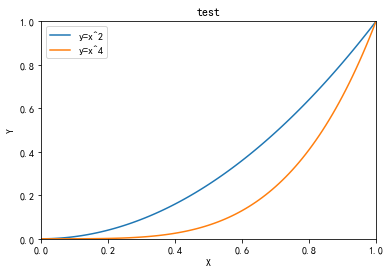

In [325]:
data = np.arange(0,1.1,0.01)
plt.title('test')
plt.xlabel('X')
plt.ylabel('Y')
#定下xy轴范围
plt.xlim((0,1))
plt.ylim((0,1))
#确定xy轴刻度
plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.yticks([0,0.2,0.4,0.6,0.8,1])
#画图
plt.plot(data,data**2)
plt.plot(data,data**4)
#添加图例
plt.legend(['y=x^2','y=x^4'],loc=2)
#legend可以通过loc参数指定图例的位置（1是右上角，2是左上角，3是左下角等等）
plt.savefig('../test.png')
plt.show()

#### 绘制子图示例
[子图add_subplot参考](https://www.sogou.com/link?url=DSOYnZeCC_pKZzihDKzFgzQoUkRGi7SFpmCC6ra1tyflRQBB3amNXw..)

比如说figure中要画两张图，就是add_subplot(2,1,1)/(2,1,2)，横着并列；(1,2,1)/(1,2,2)，竖着并列。第三个数代表第几张子图。**注：如果数值小于10可以简写成211,212**

[如何让子图纵坐标一致](https://zhuanlan.zhihu.com/p/31856211)

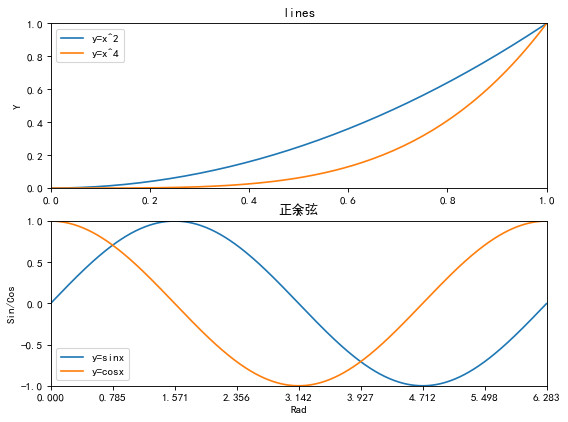

In [251]:
rad = np.arange(0,np.pi*2,0.01)#np.pi是π
#定画布大小
p1 = plt.figure(figsize=(8,6),dpi=80)#8行6列
#子图一
ax1 = p1.add_subplot(2,1,1)
plt.title('lines')
plt.xlabel('X')
plt.ylabel('Y')
#定下xy轴范围
plt.xlim((0,1))
plt.ylim((0,1))
#确定xy轴刻度
plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.yticks([0,0.2,0.4,0.6,0.8,1])
#画图
plt.plot(rad,rad**2)
plt.plot(rad,rad**4)
#添加图例
plt.legend(['y=x^2','y=x^4'])

#子图二
ax2 = p1.add_subplot(2,1,2)
# plt.title('sin/cos')
#配置rc参数显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.title('正余弦')
plt.xlabel('Rad')
plt.ylabel('Sin/Cos')
plt.xlim((0,np.pi*2))
plt.ylim((-1,1))
plt.xticks([0,np.pi/4,np.pi/2,np.pi*3/4,np.pi,np.pi*5/4,np.pi*3/2,np.pi*7/4,np.pi*2])
plt.yticks([-1,-0.5,0,0.5,1])
plt.plot(rad,np.sin(rad))
plt.plot(rad,np.cos(rad))
plt.legend(['y=sinx','y=cosx'])
plt.show()

##### 散点图
- 判断相关关系（线性、非线性）
- 判断离群点
> 语法.plt.scatter(x,y,s=20,c='b',marker='o')
主要参数是x，y两个要探究相关性的arr。
> - s接收数值和x等长的arr，表示点的大小
> - c表示点颜色，'b':blue,'y':yellow,'r':red,'g':green等
> - marker表示绘制点的类型

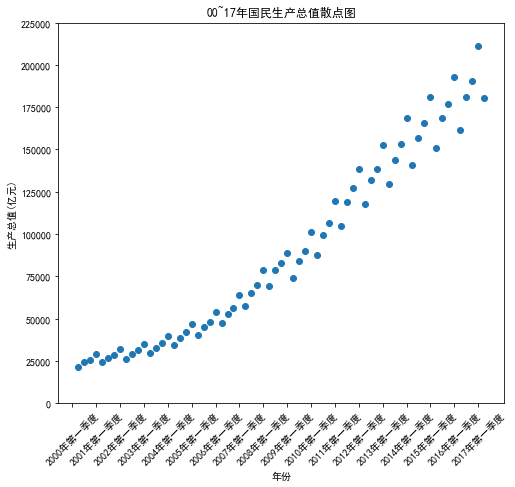

In [352]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
data = np.load('../国民经济核算季度数据.npz')
# print(data.files)
# print(data['columns'],'\n',data['columns'].shape)
# print(data['values'].shape)
# data['values']

name = data['columns']
value = data['values']
plt.figure(figsize=(8,7))
plt.scatter(value[:,0],value[:,2],marker='o')
plt.xlabel('年份')
plt.ylabel('生产总值(亿元)')
plt.ylim((0,225000))
plt.xticks(range(0,70,4),value[range(0,70,4),1],rotation=45)
plt.title('00~17年国民生产总值散点图')

plt.savefig('../00~17年国民生产总值散点图.png')
plt.show()

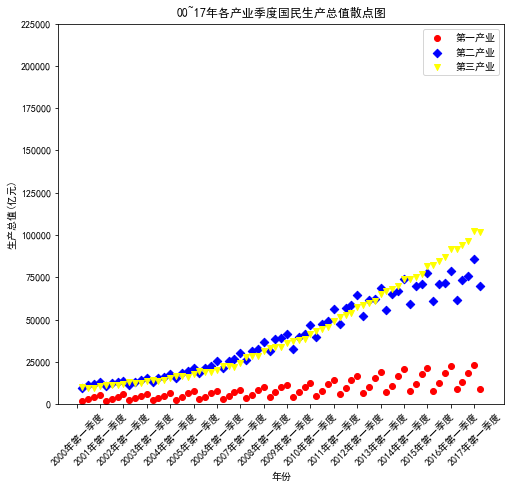

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



In [220]:
plt.figure(figsize=(8,7))
#picture 1
plt.scatter(value[:,0],value[:,3],marker='o',c='red')
#pivture 2
plt.scatter(value[:,0],value[:,4],marker='D',c='blue')
#picture 3
plt.scatter(value[:,0],value[:,5],marker='v',c='yellow')
plt.xlabel('年份')
plt.ylabel('生产总值(亿元)')
plt.ylim((0,225000))
plt.xticks(range(0,70,4),value[range(0,70,4),1],rotation=45)#rotation刻度值角度
plt.title('00~17年各产业季度国民生产总值散点图')
plt.legend(['第一产业','第二产业','第三产业'])
plt.savefig('../00~17年各产业季度国民生产总值散点图.png')
plt.show()
help(plt.xticks)

##### 折线图
- 趋势关系
- 数量差异
> plt.plot(x,y,color=None,linestyle='-',marker=None,alpha=None)
> - color同上面的c，补充一下'k':黑，'c':青
> - linestyle线条类型，marker同上
> - alpha接收0~1小数，表示点的透明度

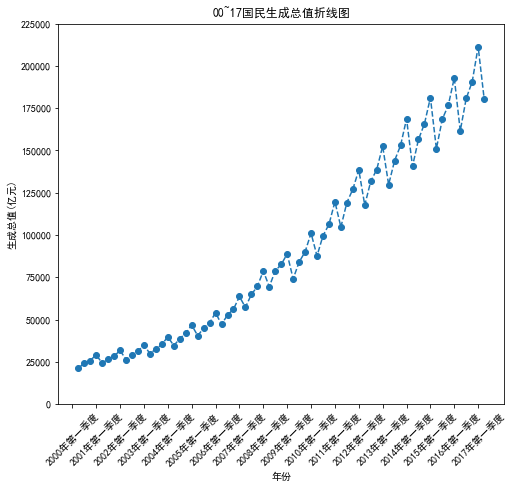

In [289]:
plt.figure(figsize=(8,7))
plt.plot(value[:,0],value[:,2],linestyle='--',marker='o')
plt.xlabel('年份')
plt.ylabel('生成总值(亿元)')
plt.ylim((0,225000))
#特意标记某个点
# plt.annotate(xy=[value[:,0][36],value[:,2][36]],s='Look')
plt.xticks(range(0,70,4),value[range(0,70,4),1],rotation=45)
plt.title('00~17国民生成总值折线图')
plt.savefig('../00~17国民生成总值折线图.png')
plt.show()

- **plot一次可以接收多组arr，绘制多条折线图**
- **定义点线的形状颜色的三个参数可连接起来用一个字符串表示**，如'ro-.','bD--','ys-'

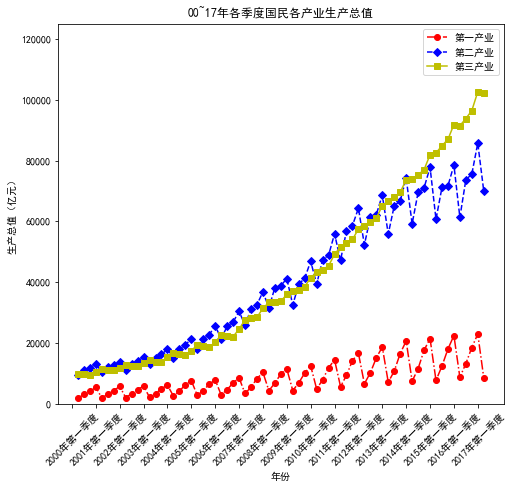

In [227]:
plt.figure(figsize=(8,7))
plt.plot(value[:,0],value[:,3],'ro-.',
        value[:,0],value[:,4],'bD--',
        value[:,0],value[:,5],'ys-')
plt.xlabel('年份')
plt.ylabel('生产总值（亿元）')
plt.ylim((0,125000))
plt.xticks(range(0,70,4),value[range(0,70,4),1],rotation=45)
plt.title('00~17年各季度国民各产业生产总值')
plt.legend(['第一产业','第二产业','第三产业'])
plt.savefig('../00~17年各季度国民各产业生产总值折线图.png')
plt.show()

In [229]:
print(name.shape,value.shape)
name

(15,) (69, 15)


array(['序号', '时间', '国内生产总值_当季值(亿元)', '第一产业增加值_当季值(亿元)', '第二产业增加值_当季值(亿元)',
       '第三产业增加值_当季值(亿元)', '农林牧渔业增加值_当季值(亿元)', '工业增加值_当季值(亿元)',
       '建筑业增加值_当季值(亿元)', '批发和零售业增加值_当季值(亿元)', '交通运输、仓储和邮政业增加值_当季值(亿元)',
       '住宿和餐饮业增加值_当季值(亿元)', '金融业增加值_当季值(亿元)', '房地产业增加值_当季值(亿元)',
       '其他行业增加值_当季值(亿元)'], dtype=object)

##### 子图绘制，细分各产业生产总值
- 由name可知value的15列与之相对应

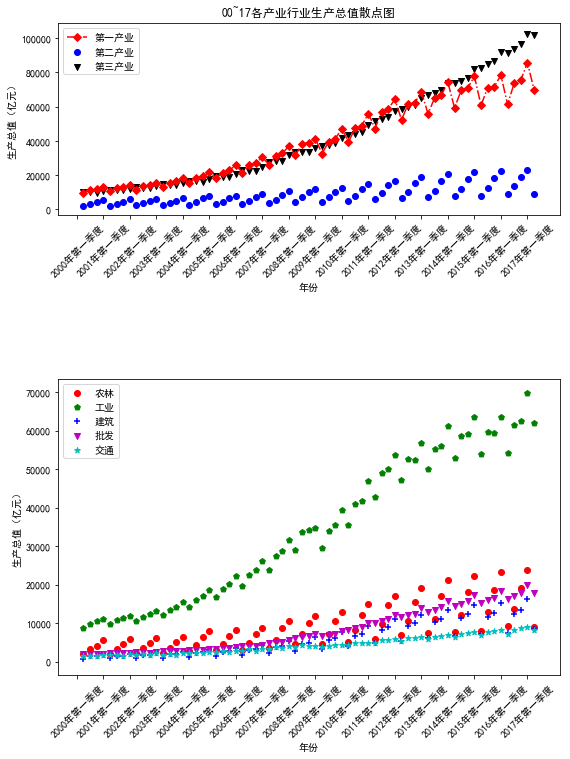

In [249]:
import numpy as np
import matplotlib.pyplot as plt
#设置显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
#画布、子图
pl = plt.figure(figsize=(9,12))
ax1 = pl.add_subplot(3,1,1)

data = np.load('../国民经济核算季度数据.npz')
name = data['columns']
value = data['values']
#散点图
plt.scatter(value[:,0],value[:,3],c='b',marker='o')
# plt.scatter(value[:,0],value[:,4],c='r',marker='D')
plt.plot(value[:,0],value[:,4],'rD-.')
plt.scatter(value[:,0],value[:,5],c='k',marker='v')
plt.xlabel('年份')
plt.ylabel('生产总值（亿元）')
plt.xticks(range(0,70,4),value[range(0,70,4),1],rotation=45)
plt.title('00~17各产业行业生产总值散点图')
plt.legend(['第一产业','第二产业','第三产业'])

#散点图2
ax2 = pl.add_subplot(2,1,2)
plt.scatter(value[:,0],value[:,6],c='r',marker='o')
plt.scatter(value[:,0],value[:,7],c='g',marker='p')
plt.scatter(value[:,0],value[:,8],c='b',marker='+')
plt.scatter(value[:,0],value[:,9],c='m',marker='v')
plt.scatter(value[:,0],value[:,10],c='c',marker='*')
plt.xlabel('年份')
plt.ylabel('生产总值（亿元）')
plt.xticks(range(0,70,4),value[range(0,70,4),1],rotation=45)
plt.legend(['农林','工业','建筑','批发','交通'])
plt.savefig('../00~17年各产业与行业国民生产总值散点图.png')
plt.show()

#### 柱状图
- 分组数据的分布
- 分组数据之间的比较

> plt.bar(left,height,width=0.8,bottom=None,hold=None,data=None)

凑合看一下，没找到好点的博客[Python绘图问题：Matplotlib中柱状图bar使用](https://blog.csdn.net/liangzuojiayi/article/details/78187704)

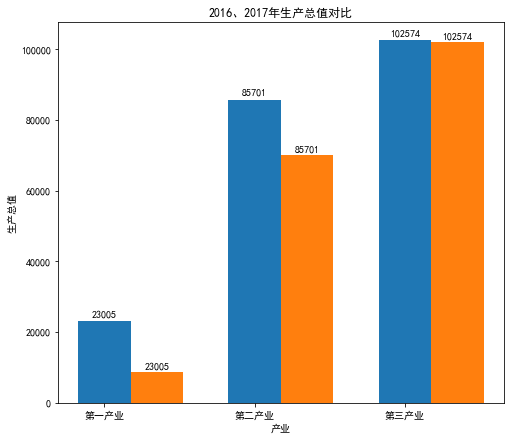

In [277]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
data = np.load('../国民经济核算季度数据.npz')
name = data['columns']
value = data['values']
plt.figure(figsize=(8,7))
x = range(0,3)
x1 = [i+0.35 for i in range(0,3)]
plt.bar(x,value[-2,3:6],width=0.35)
plt.bar(x1,value[-1,3:6],width=0.35)
#为直方图每一直柱注释
for i in range(len(x1)):
    plt.text(x1[i],value[-1,3:6][i]+500,'%d'%value[-2,3:6][i],ha='center', va= 'bottom')
    
for x,y in zip(x,value[-2,3:6]):
    plt.text(x,y+1000,'%d'%y,ha='center', va= 'bottom')
plt.xlabel('产业')
plt.ylabel('生产总值')
plt.xticks(range(0,3),['第一产业','第二产业','第三产业'])
plt.title('2016、2017年生产总值对比')
plt.show()

#### 饼图
- 数据内部占比情况

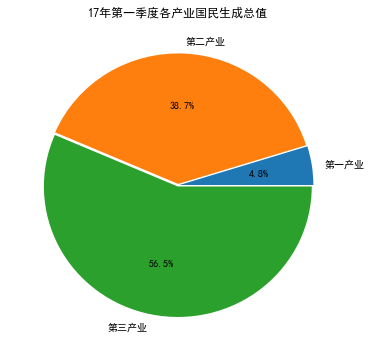

In [286]:
plt.figure(figsize=(6,6))#画布正方形，画出的圆是正圆
label = ['第一产业','第二产业','第三产业']
explode = [0.01,0.01,.01]
plt.pie(value[-1,3:6],explode=explode,labels=label,autopct='%1.1f%%')
plt.title('17年第一季度各产业国民生成总值')
plt.show()

#### Matplotlib整理
- plot()画直线，常见的三种样式参数
    - 颜色：'bgrcykm'
    - 线条：-实线，--虚线，-.点划线，:点线
    - 点：'.ov<>sp*h+xD'
    - 三个参数可用一个字符串表示
- 注释图表：当一个数据点不在预估的范围内，这时要标注它，可以使用`plt.annotate()`
> 如plt.annotate(xy=[1,1],s='Look')
- scatter()画散点图，前面记得挺清楚
- pie()画饼图
    - values：一组数据用来测百分比
    - colors：可以指定values中的数据的颜色（也表示和values等长）
    - labels：标签，标记values中的数据
    - explode：凸显值列表，代表values中数据所占的扇形离圆心的距离（默认都是0）
    - autopct：常见的是 `%1.1f%%` 将百分比显示到对应扇形图上
        - 格式化的形式，1.1f代表保留一位小数的浮点型，后面的%代表以%结尾（同理可用`%d%%`）
    - shadow:True/False，是否显示阴影
- bar()画柱状图
    - left：x轴数据
    - height：对应y轴数据
    - width：柱的宽度
    - color：颜色
- plt.text()标注（看示例）
- plt.grid()加网格

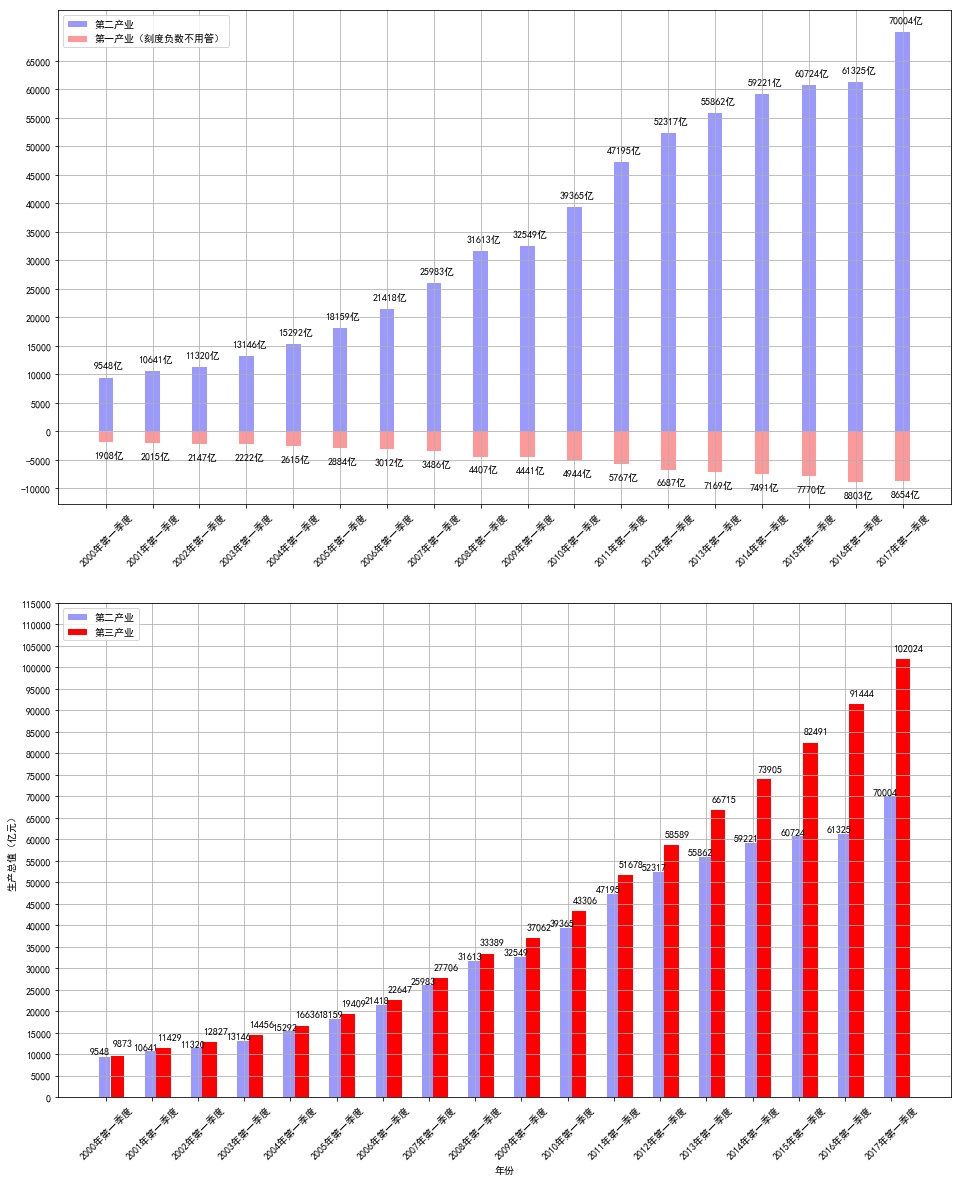

In [356]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
data = np.load('../国民经济核算季度数据.npz')
name = data['columns']
value = data['values']
p = plt.figure(figsize=(16,20))
ax1 = p.add_subplot(211)
x = range(0,len(value),4)
y1 = value[x,3]
y2 = value[x,4]
#facecolor：背景颜色 ，edgecolor：边框颜色
plt.bar(x,y2,width=1.25,facecolor='#9999ff',edgecolor='w')
plt.bar(x,-y1,width=1.25,facecolor='#ff9999',edgecolor='w')
plt.grid()
#标注
for i,j in zip(x,y1):
    #ha水平对齐方式，center水平居中对齐
    #va垂直对齐方式，bottom垂直向下对齐，top向上对齐
    #这里的i+0.25，-j-3000仅仅是图中的位置，按你看着舒服调动
    plt.text(i+0.25,-j-3000,'%d亿'%j,ha='center',va='bottom')
    
for i,j in zip(x,y2):
    plt.text(i+0.25,j+3000,'%d亿'%j,ha='center',va='top')
plt.legend(['第二产业','第一产业（刻度负数不用管）'],loc=2)
plt.yticks(range(-10000,70000,5000))
plt.xticks(x,value[x,1],rotation=45)

ax2 = p.add_subplot(212)
x1 = range(1,len(value)+1,4)
y3 = value[x,5]
plt.bar(x,y2,width=1.25,facecolor='#9999ff',edgecolor='w')
plt.bar(x1,y3,width=1.25,facecolor='r',edgecolor='w')
plt.grid()
for i,j in zip(x,y2):
    plt.text(i-0.5,j+2000,'%d'%j,ha='center',va='top')
for i,j in zip(x1,y3):
    plt.text(i+0.5,j+3500,'%d'%j,ha='center',va='top')
plt.ylabel('生产总值（亿元）')
plt.xlabel('年份')
plt.yticks(range(0,120000,5000))
plt.xticks(x,value[x,1],rotation=45)
plt.legend(['第二产业','第三产业'],loc=2)
plt.show()

### Pandas
#### 一、数据读写
- 文本文件（csv、txt）
- 数据库数据
- Excel文件

#### 读写数据库（MySQL为例）
- 必须要sqlalchemy库配合数据库连接工具（如pymysql）

In [357]:
from sqlalchemy import create_engine

ModuleNotFoundError: No module named 'sqlalchemy'

#### 读写文本文件
- read_table()/read_csv()
    - 两者用法相似，参数一样，仅有区别再用前者默认分隔符为制表符Tab键，后者为逗号
    - 与我而言，习惯前者读取txt，后者读取csv
    - 常用参数列举
        - filepath
        - sep：分隔符
        - header='infer'：接收int，以某行数据为列名，默认infer（自动识别）
        - names=None：接收array，指定列名
        - index_col：接收int或sequence，前者指定索引在那一列，后者代表多重索引
        - encoding=utf8：可指定编码
        - nrows=None：接收int，读取前n行
- to_csv()
    - path
    - sep
    - na_rep=''：指定缺失值，默认''
    - columns：接收list，指定写入的列名
    - header=True：是否写入列名
    - index=True：是否写入索引
    - encoding

In [358]:
import pandas as pd
path = '../data/meal_order_info.csv'

In [363]:
#读取菜品订单信息
order = pd.read_csv(path,encoding='gbk')
# order1 = pd.read_table(path,sep=',',encoding='gbk')
order.columns 

Index(['info_id', 'emp_id', 'number_consumers', 'mode', 'dining_table_id',
       'dining_table_name', 'expenditure', 'dishes_count', 'accounts_payable',
       'use_start_time', 'check_closed', 'lock_time', 'cashier_id', 'pc_id',
       'order_number', 'org_id', 'print_doc_bill_num', 'lock_table_info',
       'order_status', 'phone', 'name'],
      dtype='object')

#### 读写Excel
- read_excel()
    - filepath
    - sheetname=0：接收str、int指定Excel中哪张表（0代表第一张表，str就是明确指出表名）
    - header：同read_csv
    - names：同read_csv
    - indexx_col：同read_csv
- to_excel()
    - filepath
    - sheetname：默认使用Sheet1
    - na_rep=''：同to_csv
    - header/index/index_label/encoding：同to_csv

In [369]:
excel_path = '../data/meal_order_detail.xlsx'
mealInfo = pd.read_excel(excel_path,sheet_name='meal_order_detail3')
# mealInfo = pd.read_excel(excel_path,sheet_name=0)
mealInfo.shape

(3611, 19)

In [370]:
mealInfo.columns

Index(['detail_id', 'order_id', 'dishes_id', 'logicprn_name',
       'parent_class_name', 'dishes_name', 'itemis_add', 'counts', 'amounts',
       'cost', 'place_order_time', 'discount_amt', 'discount_reason',
       'kick_back', 'add_inprice', 'add_info', 'bar_code', 'picture_file',
       'emp_id'],
      dtype='object')

#### 二、基本对象
- DataFrame
- Series

#### DataFrame对象（重点）
- 基本属性
    - shape：形状
    - size：大小（数据个数）
    - index：行索引
    - columns：列索引
    - ndim：维度
    - dtypes：类型
    - **T：转置**
 

#### 基本增删改查
1. 查询（访问数据）
- 访问行、列
    - df[列名]/df.列名：访问某列，推荐前者
    - df[[列1，列2，...]]：访问多列
    - df[a:b]：类似list，访问某(多)行
    - 综合以上，可访问特定某个数据
- 使用loc，iloc查询
    - **注：loc针对索引名称，iloc针对索引位置**
    - loc[行索引名/条件，列索引名]
        - **注：不同于索引位置，对于行索引名称而言如 2:6 是第2到第6行（如果是位置则是2到5行）**
    
    - iloc[行索引位置，列索引位置]
    - loc/iloc对于列都可以使用[列1，列2，...]，对于行也可以类似[0,2,5]
        - 如 `mealInfo.loc[2:6,['detail_id', 'order_id','','amounts']]`
        - `mealInfo.loc[[0,2],:]/mealInfo.iloc[[0,2],[5,7,8]]`
    - loc对于行可以接收条件判断（series），iloc可以变相达到同一效果
        - 所谓条件，其实就是利用布尔索引
        - 如获取单价超过100的菜品
            - 常规：`mealInfo[mealInfo['amounts']>100][['dishes_name','amounts','counts']]`
            - loc：`mealInfo.loc[mealInfo['amounts']>100,['dishes_name','amounts','counts']]`
            - iloc：`mealInfo.iloc[(mealInfo['amounts']>100).values,[5,8,7]]`
        - iloc只接受int，integer/boolean arrdary/list
- 常用的head/tail(n=5)查看首尾n条数据
- 综合loc和iloc的ix
    - ix[行索引的名称/位置/条件，列索引名称/位置]
    - ix对于行索引区间一律都是闭区间（对于2:6，loc可以理解为闭区间，iloc为左闭右开）
    - 数据量大时，ix切片效率慢
- 还是使用loc吧，可读性更好

In [414]:
mealInfo.loc[[0,2],:]
mealInfo.iloc[[0,2],[5,7,8]]

,dishes_name,counts,amounts
0,芝士烩波士顿龙虾,1,175
2,麻辣小龙虾,1,99


In [405]:
#获取金额超过100的单品
mealInfo[mealInfo['amounts']>100][['dishes_name','amounts','counts']]
mealInfo.loc[mealInfo['amounts']>100,['dishes_name','amounts','counts']]
mealInfo.iloc[(mealInfo['amounts']>100).values,[5,8,7]]

,dishes_name,amounts,counts
0,芝士烩波士顿龙虾,175,1
7,53度茅台,128,1
11,倒立蒸梭子蟹,169,1
12,葱姜炒蟹,109,1
13,芝士烩波士顿龙虾,175,1
15,芝士烩波士顿龙虾,175,1
30,葱姜炒蟹,109,1
37,52度泸州老窖,159,1
45,倒立蒸梭子蟹,169,1
61,芝士烩波士顿龙虾,175,1


- 更改数据：就是通过访问数据并重新赋值（是对原数据更改）
- 增添数据
    - 增添一列：新建一个列索引就OK
        - 该列赋定值：mealInfo['pay_time'] = '2018-08-04'
        - 不赋定值：给一个对应的Series即可
    - 增加一行 [Efficiently add single row to Pandas Series or DataFrame
](https://stackoverflow.com/questions/13751926/efficiently-add-single-row-to-pandas-series-or-dataframe)
        - 我看到有很多推荐Series转置后再pd.concat()，将两个df链接起来（**不推荐，看到有说数据量大时耗时长**）
        - 直接追加写`df.loc[df.shape[0]] = {'列1':value,'列2':value,...}`。**如果columns明确，可以直接[value1,value2,...]代替**
- 删除数据
    - df.drop(labels,axis=0,level=None,inplace=False,errors='raise')
        - axis为0删除行，为1删除列
        - labels接收str(索引名)/array，指明删除的行/列
        - inplace：是否对原数据修改

In [423]:
df = mealInfo.head(10).copy()
df

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,3085,431,609966,NaN,NaN,芝士烩波士顿龙虾,0,1,175,NaN,2016-08-21 11:16:07,NaN,NaN,NaN,0,NaN,NaN,caipu/101001.jpg,1579
1,3086,431,609942,NaN,NaN,辣炒鱿鱼,0,1,58,NaN,2016-08-21 11:17:32,NaN,NaN,NaN,0,NaN,NaN,caipu/103003.jpg,1579
2,3088,431,609970,NaN,NaN,麻辣小龙虾,0,1,99,NaN,2016-08-21 11:18:49,NaN,NaN,NaN,0,NaN,NaN,caipu/101006.jpg,1579
3,3091,431,609956,NaN,NaN,孜然羊排,0,1,88,NaN,2016-08-21 11:20:33,NaN,NaN,NaN,0,NaN,NaN,caipu/202002.jpg,1579
4,3094,431,609957,NaN,NaN,蒙古烤羊腿\r\n\r\n\r\n,0,1,48,NaN,2016-08-21 11:20:36,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1579
5,3099,431,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-21 11:23:24,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1579
6,3102,431,610027,NaN,NaN,清炒菊花菜,0,1,30,NaN,2016-08-21 11:25:48,NaN,NaN,NaN,0,NaN,NaN,caipu/304001.jpg,1579
7,3106,431,610072,NaN,NaN,53度茅台,0,1,128,NaN,2016-08-21 11:26:24,NaN,NaN,NaN,0,NaN,NaN,caipu/401005.jpg,1579
8,3104,431,610011,NaN,NaN,白饭/大碗,0,4,10,NaN,2016-08-21 11:26:27,NaN,NaN,NaN,0,NaN,NaN,caipu/601005.jpg,1579
9,3109,431,609992,NaN,NaN,番茄炖牛腩\r\n\r\n\r\n,0,1,35,NaN,2016-08-21 11:27:14,NaN,NaN,NaN,0,NaN,NaN,caipu/201002.jpg,1579


**注意Bug**
> SettingWithCopyWarning:  A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead

报了一个警告，解决：向副本增加新的内容或是删改数据，之前应该将副本拷贝一下（所以前面用来copy方法）

In [372]:
mealInfo.columns
#dishes_name菜名，counts菜数量，amounts菜金额，order_id订单号（一个订单可以有多个菜），dishes_id菜品id

Index(['detail_id', 'order_id', 'dishes_id', 'logicprn_name',
       'parent_class_name', 'dishes_name', 'itemis_add', 'counts', 'amounts',
       'cost', 'place_order_time', 'discount_amt', 'discount_reason',
       'kick_back', 'add_inprice', 'add_info', 'bar_code', 'picture_file',
       'emp_id'],
      dtype='object')

In [400]:
df.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,3085,431,609966,NaN,NaN,芝士烩波士顿龙虾,0,1,175,NaN,2016-08-21 11:16:07,NaN,NaN,NaN,0,NaN,NaN,caipu/101001.jpg,1579
1,3086,431,609942,NaN,NaN,辣炒鱿鱼,0,1,58,NaN,2016-08-21 11:17:32,NaN,NaN,NaN,0,NaN,NaN,caipu/103003.jpg,1579
2,3088,431,609970,NaN,NaN,麻辣小龙虾,0,1,99,NaN,2016-08-21 11:18:49,NaN,NaN,NaN,0,NaN,NaN,caipu/101006.jpg,1579
3,3091,431,609956,NaN,NaN,孜然羊排,0,1,88,NaN,2016-08-21 11:20:33,NaN,NaN,NaN,0,NaN,NaN,caipu/202002.jpg,1579
4,3094,431,609957,NaN,NaN,蒙古烤羊腿\r\n\r\n\r\n,0,1,48,NaN,2016-08-21 11:20:36,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1579


In [424]:
#增加
df['pay'] = df['counts']*df['amounts']
# df
df['pay_time'] = '2018-08-04'
df.head()

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,...,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id,pay,pay_time
0,3085,431,609966,NaN,NaN,芝士烩波士顿龙虾,0,1,175,NaN,...,NaN,NaN,NaN,0,NaN,NaN,caipu/101001.jpg,1579,175,2018-08-04
1,3086,431,609942,NaN,NaN,辣炒鱿鱼,0,1,58,NaN,...,NaN,NaN,NaN,0,NaN,NaN,caipu/103003.jpg,1579,58,2018-08-04
2,3088,431,609970,NaN,NaN,麻辣小龙虾,0,1,99,NaN,...,NaN,NaN,NaN,0,NaN,NaN,caipu/101006.jpg,1579,99,2018-08-04
3,3091,431,609956,NaN,NaN,孜然羊排,0,1,88,NaN,...,NaN,NaN,NaN,0,NaN,NaN,caipu/202002.jpg,1579,88,2018-08-04
4,3094,431,609957,NaN,NaN,蒙古烤羊腿\r\n\r\n\r\n,0,1,48,NaN,...,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1579,48,2018-08-04


In [427]:
# df.head()
#删除选定的列
df.drop('pay_time',axis=1,inplace=True)
# df.head()
#删除选定的行
# df.drop([0,1,2],axis=0,inplace=True)
df
#注意，不能重复执行

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id,pay
0,3085,431,609966,NaN,NaN,芝士烩波士顿龙虾,0,1,175,NaN,2016-08-21 11:16:07,NaN,NaN,NaN,0,NaN,NaN,caipu/101001.jpg,1579,175
1,3086,431,609942,NaN,NaN,辣炒鱿鱼,0,1,58,NaN,2016-08-21 11:17:32,NaN,NaN,NaN,0,NaN,NaN,caipu/103003.jpg,1579,58
2,3088,431,609970,NaN,NaN,麻辣小龙虾,0,1,99,NaN,2016-08-21 11:18:49,NaN,NaN,NaN,0,NaN,NaN,caipu/101006.jpg,1579,99
3,3091,431,609956,NaN,NaN,孜然羊排,0,1,88,NaN,2016-08-21 11:20:33,NaN,NaN,NaN,0,NaN,NaN,caipu/202002.jpg,1579,88
4,3094,431,609957,NaN,NaN,蒙古烤羊腿\r\n\r\n\r\n,0,1,48,NaN,2016-08-21 11:20:36,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1579,48
5,3099,431,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-21 11:23:24,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1579,13
6,3102,431,610027,NaN,NaN,清炒菊花菜,0,1,30,NaN,2016-08-21 11:25:48,NaN,NaN,NaN,0,NaN,NaN,caipu/304001.jpg,1579,30
7,3106,431,610072,NaN,NaN,53度茅台,0,1,128,NaN,2016-08-21 11:26:24,NaN,NaN,NaN,0,NaN,NaN,caipu/401005.jpg,1579,128
8,3104,431,610011,NaN,NaN,白饭/大碗,0,4,10,NaN,2016-08-21 11:26:27,NaN,NaN,NaN,0,NaN,NaN,caipu/601005.jpg,1579,40
9,3109,431,609992,NaN,NaN,番茄炖牛腩\r\n\r\n\r\n,0,1,35,NaN,2016-08-21 11:27:14,NaN,NaN,NaN,0,NaN,NaN,caipu/201002.jpg,1579,35


In [428]:
df

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id,pay
0,3085,431,609966,NaN,NaN,芝士烩波士顿龙虾,0,1,175,NaN,2016-08-21 11:16:07,NaN,NaN,NaN,0,NaN,NaN,caipu/101001.jpg,1579,175
1,3086,431,609942,NaN,NaN,辣炒鱿鱼,0,1,58,NaN,2016-08-21 11:17:32,NaN,NaN,NaN,0,NaN,NaN,caipu/103003.jpg,1579,58
2,3088,431,609970,NaN,NaN,麻辣小龙虾,0,1,99,NaN,2016-08-21 11:18:49,NaN,NaN,NaN,0,NaN,NaN,caipu/101006.jpg,1579,99
3,3091,431,609956,NaN,NaN,孜然羊排,0,1,88,NaN,2016-08-21 11:20:33,NaN,NaN,NaN,0,NaN,NaN,caipu/202002.jpg,1579,88
4,3094,431,609957,NaN,NaN,蒙古烤羊腿\r\n\r\n\r\n,0,1,48,NaN,2016-08-21 11:20:36,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1579,48
5,3099,431,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-21 11:23:24,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1579,13
6,3102,431,610027,NaN,NaN,清炒菊花菜,0,1,30,NaN,2016-08-21 11:25:48,NaN,NaN,NaN,0,NaN,NaN,caipu/304001.jpg,1579,30
7,3106,431,610072,NaN,NaN,53度茅台,0,1,128,NaN,2016-08-21 11:26:24,NaN,NaN,NaN,0,NaN,NaN,caipu/401005.jpg,1579,128
8,3104,431,610011,NaN,NaN,白饭/大碗,0,4,10,NaN,2016-08-21 11:26:27,NaN,NaN,NaN,0,NaN,NaN,caipu/601005.jpg,1579,40
9,3109,431,609992,NaN,NaN,番茄炖牛腩\r\n\r\n\r\n,0,1,35,NaN,2016-08-21 11:27:14,NaN,NaN,NaN,0,NaN,NaN,caipu/201002.jpg,1579,35


In [429]:
df.loc[df.shape[0]] = [3106,431,610073,np.NaN,np.NaN,'哇哈哈',0,1,5,np.nan,'2016-08-21 11:26:40',np.nan,np.nan,np.nan,0,np.nan,np.nan,'caipu/401006.jpg',1579,5]

In [431]:
# df.shape[0]
df

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id,pay
0,3085,431,609966,NaN,NaN,芝士烩波士顿龙虾,0,1,175,NaN,2016-08-21 11:16:07,NaN,NaN,NaN,0,NaN,NaN,caipu/101001.jpg,1579,175
1,3086,431,609942,NaN,NaN,辣炒鱿鱼,0,1,58,NaN,2016-08-21 11:17:32,NaN,NaN,NaN,0,NaN,NaN,caipu/103003.jpg,1579,58
2,3088,431,609970,NaN,NaN,麻辣小龙虾,0,1,99,NaN,2016-08-21 11:18:49,NaN,NaN,NaN,0,NaN,NaN,caipu/101006.jpg,1579,99
3,3091,431,609956,NaN,NaN,孜然羊排,0,1,88,NaN,2016-08-21 11:20:33,NaN,NaN,NaN,0,NaN,NaN,caipu/202002.jpg,1579,88
4,3094,431,609957,NaN,NaN,蒙古烤羊腿\r\n\r\n\r\n,0,1,48,NaN,2016-08-21 11:20:36,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1579,48
5,3099,431,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-21 11:23:24,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1579,13
6,3102,431,610027,NaN,NaN,清炒菊花菜,0,1,30,NaN,2016-08-21 11:25:48,NaN,NaN,NaN,0,NaN,NaN,caipu/304001.jpg,1579,30
7,3106,431,610072,NaN,NaN,53度茅台,0,1,128,NaN,2016-08-21 11:26:24,NaN,NaN,NaN,0,NaN,NaN,caipu/401005.jpg,1579,128
8,3104,431,610011,NaN,NaN,白饭/大碗,0,4,10,NaN,2016-08-21 11:26:27,NaN,NaN,NaN,0,NaN,NaN,caipu/601005.jpg,1579,40
9,3109,431,609992,NaN,NaN,番茄炖牛腩\r\n\r\n\r\n,0,1,35,NaN,2016-08-21 11:27:14,NaN,NaN,NaN,0,NaN,NaN,caipu/201002.jpg,1579,35


#### 对df描述性统计分析
- 对数值进行统计【基于numpy实现的，所以以下函数同理可通过np.func()实现】
    - df.describe()：描述性统计（常用）
    - df.max/min/mean/median/mod()：最大/小值、平均值、中位数、众数
    - df.std/var/cov()：标准差、方差、协方差

In [451]:
print(mealInfo['amounts'].max(),'--->',)
# mealInfo[mealInfo['amounts']==mealInfo['amounts'].min()]['dishes_name']
a= mealInfo['amounts'].mode()
#mode返回的是排好序的DateFrame，因为众数可能出现多个
a

178 --->


0    35
dtype: int64

In [453]:
mealInfo[['amounts','counts']].describe()

,amounts,counts
count,3611.000000,3611.000000
mean,44.748823,1.104403
std,35.698775,0.600471
min,1.000000,1.000000
25%,22.500000,1.000000
50%,35.000000,1.000000
75%,56.000000,1.000000
max,178.000000,10.000000


- 基于类别的描述性统计
    - 统计频数value_counts()
    - 将目标数据的类型转为category类型，describe支持对category类型数据进行描述性统计
        - 利用astype('category')方法转换

In [458]:
mealInfo['dishes_name'].value_counts()

白饭/大碗                109
凉拌菠菜                  99
谷稻小庄                  84
麻辣小龙虾                 77
辣炒鱿鱼                  70
芝士烩波士顿龙虾              70
香酥两吃大虾                67
水煮鱼                   59
白饭/小碗                 58
焖猪手                   57
五色糯米饭(七色)             55
蒙古烤羊腿\r\n\r\n\r\n     49
凉拌蒜蓉西兰花               49
西瓜胡萝卜沙拉               48
清蒸海鱼                  48
自制猪肉脯                 46
炝炒大白菜                 46
美妙绝伦之白莲花              45
意文柠檬汁                 44
香烤牛排\r\n\r\n\r\n      44
油焖麻辣虾                 44
番茄炖牛腩\r\n\r\n\r\n     43
孜然羊排                  42
白胡椒胡萝卜羊肉汤             41
爆炒猪肝                  41
桂圆肉红豆八宝饭              40
剁椒鱼头                  40
糖醋蕃茄溜青花               37
清蒸蝶鱼                  37
芹菜炒腰花                 36
                    ... 
 42度海之蓝                8
酸辣汤面                   8
特醇嘉士伯啤酒罐装              7
牛奶卷                    7
咖啡奶香面包                 7
快炒黄鳝                   7
小炒羊腰\r\n\r\n\r\n       7
52度泸州老窖                6
长城窖酿解百纳红酒干红葡萄酒         6


In [464]:
mealInfo['dishes_name'] = mealInfo['dishes_name'].astype('category')
# mealInfo['dishes_name'].dtypes
mealInfo['dishes_name'].describe()
#count:非空数据数目
#unique:有多少类别
#top:数目最多的类别
#freq:top的次数

count      3611
unique      154
top       白饭/大碗
freq        109
Name: dishes_name, dtype: object